# ASSIGNMENT 7

#### Name: Hrsh Dhingra
#### Roll no.: 102103443
#### Section: CO16

# MULTI-THREADING

## Multiplying 100 random matrices of size 1k x 1k with a constant matrix (1k x 1k) using multithreading

### Create and display dashboard

#### Requirements

In [1]:
import random
import threading
import time
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

#### Defining functions

In [2]:
def matrix_multiplication(A, B, index, result):
    
    result[index] = np.dot(A, B)

In [3]:
def run_with_threads(num_threads):
    
    start_time = time.time()
    threads = []
    
    for i, matrix in enumerate(matrices):
        thread = threading.Thread(target=matrix_multiplication, args=(A, matrix, i, results))
        threads.append(thread)
        thread.start()
        
    for thread in threads:
        thread.join()
        
    end_time = time.time()

    return end_time - start_time

#### Execution

In [4]:
# my computer has 10 cores
# 2 efficiency and 8 performance cores (total 10)
# threading will utilize all of them

A = np.random.rand(1000, 1000) 

results = [None] * 100 

matrices = [np.random.rand(1000, 1000) for _ in range(100)] # random matrices

results_table = []

num_threads=list(range(1,11))

time_taken=[]

for num_t in num_threads:
    ttime= run_with_threads(num_t)
    time_taken.append(ttime)
    results_table.append(("T="+str(num_t), round(ttime,4)))

ans = list(zip(*results_table)) 

print(tabulate(ans,tablefmt="grid", showindex=["Threads", "Time taken (sec)"]))

+------------------+---------+---------+---------+---------+---------+--------+---------+---------+---------+---------+
| Threads          | T=1     | T=2     | T=3     | T=4     | T=5     | T=6    | T=7     | T=8     | T=9     | T=10    |
+------------------+---------+---------+---------+---------+---------+--------+---------+---------+---------+---------+
| Time taken (sec) | 17.6609 | 17.4398 | 16.4176 | 16.5703 | 16.3083 | 16.023 | 16.9232 | 15.7326 | 15.8179 | 15.6831 |
+------------------+---------+---------+---------+---------+---------+--------+---------+---------+---------+---------+


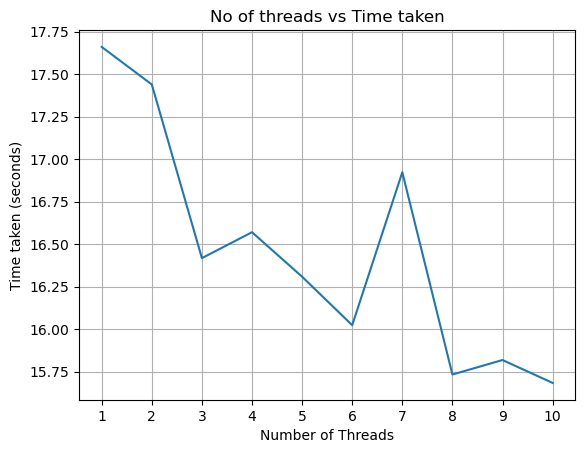

In [5]:
# Plotting graph

plt.plot(num_threads, time_taken)
plt.xlabel('Number of Threads')
plt.ylabel('Time taken (seconds)')
plt.title('No of threads vs Time taken')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()